In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# preprocessed file from the presvious implementation of Random Forest technique
appl_df= pd.read_csv("Python_preprocessed_appl_stock_prices.csv")

In [3]:
appl_df.head()

,Date,Open,High,Low,Close,Volume,Price Change,Moving Average 7,Moving Average 14
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,21660800,0.001674,0.152184,0.137197
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,35728000,-0.003348,0.154018,0.138791
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,45158400,-0.006697,0.153858,0.140386
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,55686400,-0.006138,0.150909,0.142179
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,39827200,-0.002790,0.147242,0.143575


In [4]:
appl_df.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                 int64
Price Change         float64
Moving Average 7     float64
Moving Average 14    float64
dtype: object

In [5]:
appl_df.describe()

,Open,High,Low,Close,Volume,Price Change,Moving Average 7,Moving Average 14
count,10840.000000,10840.000000,10840.000000,10840.000000,1.084000e+04,10840.000000,10840.000000,10840.000000
mean,20.081924,20.301790,19.870533,20.095441,3.217449e+08,0.017747,20.042021,19.979021
std,41.959798,42.423274,41.527814,41.997456,3.364613e+08,0.840063,41.890887,41.764903
min,0.049665,0.049665,0.049107,0.049107,0.000000e+00,-10.519997,0.051897,0.054568
25%,0.295759,0.302455,0.287946,0.296178,1.163194e+08,-0.010536,0.296556,0.296417
50%,0.511161,0.520089,0.503103,0.511719,2.091508e+08,0.000000,0.510842,0.510762
75%,18.924821,19.061161,18.732769,18.940536,4.016893e+08,0.015625,18.927526,18.905414
max,198.020004,199.619995,197.000000,198.110001,7.421641e+09,12.000000,196.572861,195.260716


In [6]:
#preparing the data

In [7]:
X =appl_df[['Open', 'High', 'Low', 'Volume', 'Moving Average 7', 'Moving Average 14']]
y =appl_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# model biuilding
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Evaluating the model

In [10]:
y_pred =model.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

r_squared = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error for Multiple Regression:", mse)
print("R² Score for Multiple Regression:", r_squared)


Mean Squared Error for Multiple Regression: 0.08480914375518105
R² Score for Multiple Regression: 0.9999517492777671


In [12]:
import numpy as np
from sklearn.metrics import mean_absolute_error
# RMSE
rmse_rf = np.sqrt(mse)

# MAE
mae_rf = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")

Root Mean Squared Error (RMSE): 0.29122009504012775
Mean Absolute Error (MAE): 0.09159210058931559


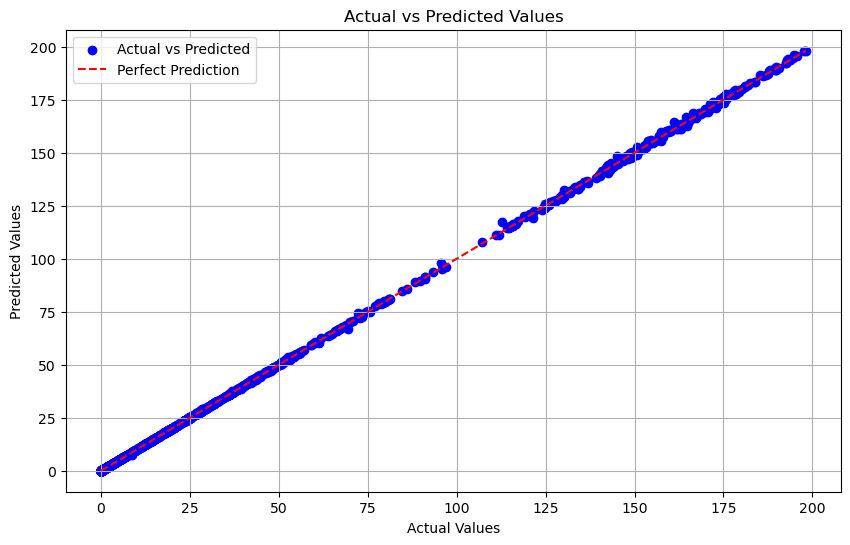

In [13]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# for training set
y_train_pred =model.predict(X_train)

# for test set
y_test_pred=model.predict(X_test)


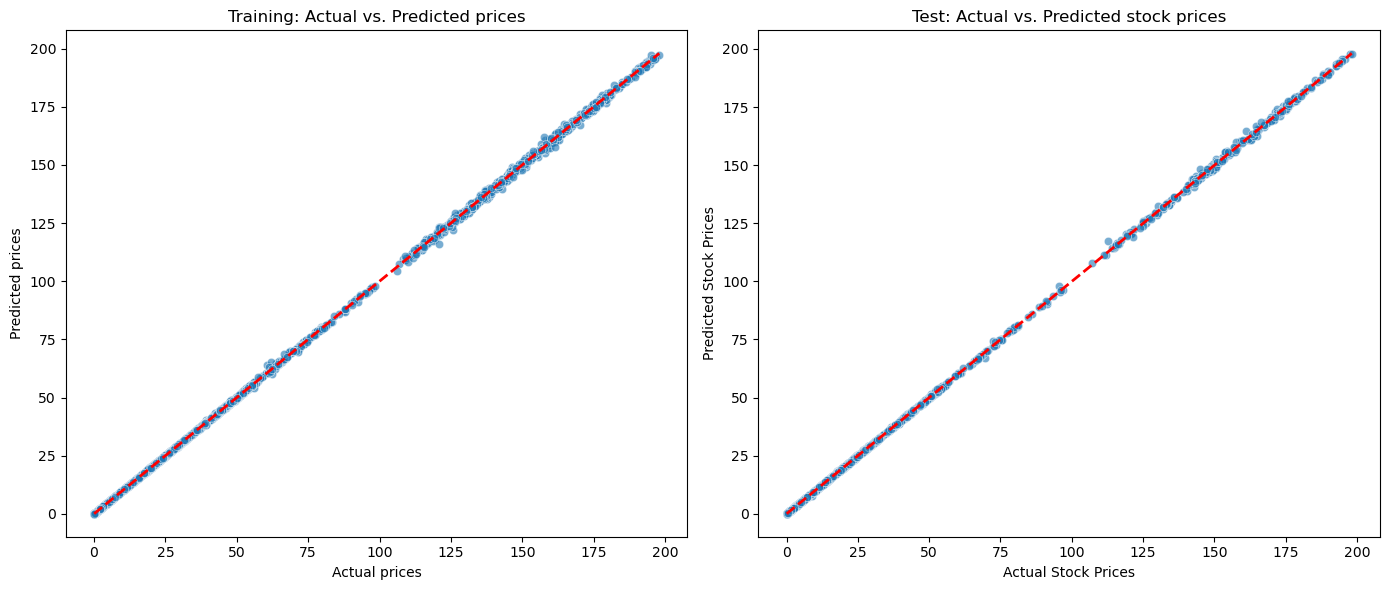

In [15]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1) 
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.title('Training: Actual vs. Predicted prices')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')


plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Test: Actual vs. Predicted stock prices')
plt.xlabel('Actual Stock Prices')
plt.ylabel('Predicted Stock Prices')

plt.tight_layout()
plt.show()
